# Linear Algebra for Machine Learning: A Beginner's Guide

This notebook teaches **Linear Algebra** through **hands-on examples** using the **Iris dataset** — no prior math expertise needed!

We'll cover:
- Vectors, matrices, and operations
- Eigenvalues, PCA, SVD
- Real ML applications

Perfect for beginners starting in ML, AI, or data science.

In [52]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist, squareform

# Load Iris dataset
iris = load_iris()
X = iris.data  # (150, 4): sepal/petal length/width
y = iris.target  # (150,): species
feature_names = iris.feature_names
target_names = iris.target_names

# Center the data (subtract mean)
X_centered = X - X.mean(axis=0)

print("Dataset Shape:", X.shape)
print("Features:", feature_names)
print("Classes:", target_names)

Dataset Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


## 1. Vectors & Vector Operations

A **vector** is a list of numbers. In ML, each flower is a 4D vector.

In [53]:
v1 = X[0]  # First flower
v2 = X[1]  # Second flower

print("Vector v1:", np.round(v1, 2))
print("Vector v2:", np.round(v2, 2))

# Operations
dot = np.dot(v1, v2)
norm_v1 = np.linalg.norm(v1)
cos_sim = dot / (norm_v1 * np.linalg.norm(v2))

print(f"Dot Product: {dot:.3f}")
print(f"Cosine Similarity: {cos_sim:.3f}")

Vector v1: [5.1 3.5 1.4 0.2]
Vector v2: [4.9 3.  1.4 0.2]
Dot Product: 37.490
Cosine Similarity: 0.999


✅ **Why it matters**: Cosine similarity measures shape similarity — used in search, clustering.

## 2. Matrices & Matrix Operations

A **matrix** is a table of vectors. The Iris dataset is a (150, 4) matrix.

In [54]:
print("Data matrix shape:", X.shape)

# Transformation: Combine sepal and petal features
W = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])
X_new = X @ W  # (150, 2)

print("Transformed shape:", X_new.shape)

Data matrix shape: (150, 4)
Transformed shape: (150, 2)


✅ **Why it matters**: Matrix multiplication powers neural networks and feature engineering.

## 3. Types of Matrices

Common matrices:
- **Diagonal**: Scaling features
- **Identity**: Does nothing
- **Symmetric**: Covariance matrix

In [55]:
# Diagonal scaling matrix
D = np.diag(1 / X.std(axis=0))
X_scaled = X @ D

# Symmetric check
Cov = np.cov(X.T)
is_sym = np.allclose(Cov, Cov.T)

print("Covariance symmetric:", is_sym)

Covariance symmetric: True


✅ **Why it matters**: Diagonal matrices normalize data. Symmetric matrices are stable and common.

## 4. Determinant & Inverse

Used to solve equations and measure transformation effects.

In [56]:
det = np.linalg.det(Cov)
inv_Cov = np.linalg.inv(Cov)

print(f"Determinant: {det:.3f}")
print("Inverse (top-left 2x2):\n", np.round(inv_Cov[:2, :2], 3))

Determinant: 0.002
Inverse (top-left 2x2):
 [[10.315 -6.713]
 [-6.713 11.058]]


✅ **Why it matters**: Inverse is used in Gaussian models and LDA.

## 5. Solving Linear Equations

Solve `Ax = b` to fit models like linear regression.

In [57]:
A = X[:, [0,1,2]]  # Predict petal width from others
b = X[:, 3]

x, res, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("Coefficients:", np.round(x, 3))
print("Prediction (first 3):", np.round(A[:3] @ x, 2))
print("Actual (first 3):", b[:3])

Coefficients: [-0.246  0.204  0.536]
Prediction (first 3): [0.21 0.16 0.19]
Actual (first 3): [0.2 0.2 0.2]


✅ **Why it matters**: This is how linear regression works under the hood!

## 6. Eigenvalues & Eigenvectors

They show the directions of maximum variance in data.

In [58]:
eigenvals, eigenvecs = np.linalg.eig(Cov)
idx = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:, idx]

print("Eigenvalues (variance):", np.round(eigenvals, 3))
print("First eigenvector (PC1):", np.round(eigenvecs[:, 0], 3))

Eigenvalues (variance): [4.228 0.243 0.078 0.024]
First eigenvector (PC1): [ 0.361 -0.085  0.857  0.358]


✅ **Why it matters**: These define **Principal Components** — the foundation of PCA.

## 7. Singular Value Decomposition (SVD)

Breaks any matrix into `U`, `Σ`, `Vᵀ` — used in compression and NLP.

In [59]:
U, Sigma, VT = np.linalg.svd(X_centered)

# Reconstruct using top 2 components
X_approx = U[:, :2] @ np.diag(Sigma[:2]) @ VT[:2, :]

print("Original vs Reconstructed (first row):")
print("Orig:", np.round(X_centered[0], 2))
print("Recon:", np.round(X_approx[0], 2))

Original vs Reconstructed (first row):
Orig: [-0.74  0.44 -2.36 -1.  ]
Recon: [-0.76  0.46 -2.35 -0.99]


✅ **Why it matters**: SVD is used in PCA, image compression, and recommendation systems.

## 8. Principal Component Analysis (PCA)

Reduce 4D data to 2D for visualization.

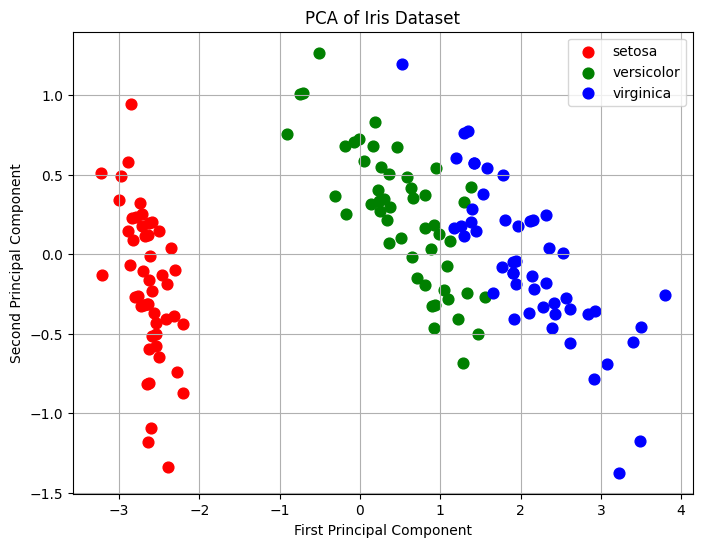

In [60]:
X_pca = X_centered @ eigenvecs[:, :2]

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, name in enumerate(target_names):
    mask = y == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=name, c=colors[i], s=60)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA of Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()

✅ **Why it matters**: PCA helps visualize high-dimensional data and reduces noise.

## 9. Linear Transformations

Rotate, scale, or project data using matrix multiplication.

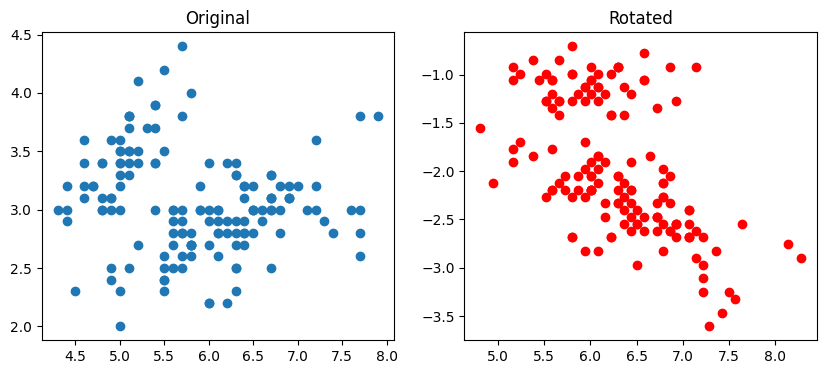

In [61]:
theta = np.radians(45)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

X_2d = X[:, :2]
X_rot = X_2d @ R

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title("Original")

plt.subplot(1, 2, 2)
plt.scatter(X_rot[:, 0], X_rot[:, 1], c='r')
plt.title("Rotated")
plt.show()

✅ **Why it matters**: Every neural network layer applies a linear transformation.

## 10. Orthogonalization (Gram-Schmidt)

Make vectors perpendicular (uncorrelated).

In [62]:
def gram_schmidt(V):
    U = np.zeros_like(V, dtype=float)
    for i in range(V.shape[1]):
        u = V[:, i].astype(float)
        for j in range(i):
            u -= np.dot(u, U[:, j]) * U[:, j]
        u /= np.linalg.norm(u)
        U[:, i] = u
    return U

V = X[:10, :3].T  # (3, 10)
Q = gram_schmidt(V)
print("Q.T @ Q (should be identity):\n", np.round(Q.T @ Q, 10))

Q.T @ Q (should be identity):
 [[ 1.00000000e+00  0.00000000e+00 -0.00000000e+00  9.99998242e-01
   1.31789390e-03 -1.33368830e-03  9.99998790e-01  1.46772650e-03
  -5.15845200e-04 -9.99999718e-01]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.30169220e-03
   9.99926225e-01  1.20768651e-02  6.01948200e-04 -6.70782948e-01
  -7.41653473e-01 -3.71422800e-04]
 [-0.00000000e+00  0.00000000e+00  1.00000000e+00 -1.34950590e-03
   1.20751079e-02 -9.99926183e-01 -1.43456460e-03  7.41652265e-01
  -6.70783019e-01  6.53217400e-04]
 [ 9.99998242e-01 -1.30169220e-03 -1.34950590e-03  1.00000000e+00
   0.00000000e+00  0.00000000e+00  9.99998184e-01  1.34001270e-03
   1.35478580e-03 -9.99998358e-01]
 [ 1.31789390e-03  9.99926225e-01  1.20751079e-02  0.00000000e+00
   1.00000000e+00 -0.00000000e+00  1.90247360e-03 -6.61775995e-01
  -7.49699215e-01 -1.68140120e-03]
 [-1.33368830e-03  1.20768651e-02 -9.99926183e-01  0.00000000e+00
  -0.00000000e+00  1.00000000e+00  1.08041700e-04 -7.49700431e-01
  

✅ **Why it matters**: Used in decorrelation and numerical stability.

## 11. Norms & Distances

Measure vector size and distance between points.

In [63]:
v = X[0]
l2 = np.linalg.norm(v, ord=2)
l1 = np.linalg.norm(v, ord=1)
print(f"L2 Norm: {l2:.3f}")
print(f"L1 Norm: {l1:.3f}")

D = squareform(pdist(X, metric='euclidean'))
print("Distances from flower 0 (first 5):", np.round(D[0, :5], 2))

L2 Norm: 6.345
L1 Norm: 10.200
Distances from flower 0 (first 5): [0.   0.54 0.51 0.65 0.14]


✅ **Why it matters**: Distance metrics power KNN, clustering, and anomaly detection.

## 12. Projection & Least Squares

Project data onto a line (e.g., PCA direction).

In [64]:
pc1 = eigenvecs[:, 0]
proj_scalar = X_centered @ pc1
X_projected = np.outer(proj_scalar, pc1)

error = np.mean((X_centered - X_projected)**2)
print(f"Mean Squared Error: {error:.3f}")

Mean Squared Error: 0.086


✅ **Why it matters**: Projection reduces dimensions while preserving structure.

## 13. Positive Definite Matrices

Covariance matrices must be positive semi-definite.

In [65]:
eigenvals_cov = np.linalg.eigvals(Cov)
print("All eigenvalues ≥ 0?", np.all(eigenvals_cov >= 0))

All eigenvalues ≥ 0? True


✅ **Why it matters**: Ensures valid probability distributions (e.g., in Gaussian models).

## 14. Putting It All Together: A Simple ML Classifier

Let’s build a **nearest centroid classifier** using only Linear Algebra!

In [66]:
# Compute mean vector for each class
centroids = np.array([X[y == i].mean(axis=0) for i in range(3)])

# Predict function
def predict(x):
    distances = [np.linalg.norm(x - c) for c in centroids]
    return np.argmin(distances)

# Test on first 10 samples
y_pred = [predict(X[i]) for i in range(10)]
print("True:  ", [target_names[i] for i in y[:10]])
print("Pred:  ", [target_names[i] for i in y_pred])

# Accuracy
acc = np.mean([predict(X[i]) == y[i] for i in range(len(X))])
print(f"\nClassifier Accuracy: {acc * 100:.1f}%")

True:   [np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa')]
Pred:   [np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa')]

Classifier Accuracy: 92.7%


## Summary: Why Linear Algebra for ML?

| Concept | ML Use |
|--------|--------|
| Vectors | Data points, embeddings |
| Matrices | Datasets, transformations |
| Eigen/SVD | PCA, compression |
| Norms | Regularization, distance |
| Projection | Dimensionality reduction |
| Inverse | Solving equations |

**You've now learned the Linear Algebra needed to understand Machine Learning**!

**Next Steps**:
- Try with other datasets (Wine, Breast Cancer)
- Learn how neural networks use these operations
- Explore PCA and SVD in `sklearn`

### 📎 References
- [Scikit-learn Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
- Gilbert Strang: *Linear Algebra and Learning from Data*
- 3Blue1Brown: *Essence of Linear Algebra* (YouTube)